In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1, 2, 3

In [4]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


In [10]:
# Simulate an Input current

for step in range(10):
    # compute value of t
    t = step * dt
    
    # compute value of i at this time
    i = i_mean * (1 + np.sin((2*np.pi*t)/0.01))
    
    print(f'{t: .3f} {i: .4e}')

 0.000  2.5000e-10
 0.001  3.9695e-10
 0.002  4.8776e-10
 0.003  4.8776e-10
 0.004  3.9695e-10
 0.005  2.5000e-10
 0.006  1.0305e-10
 0.007  1.2236e-11
 0.008  1.2236e-11
 0.009  1.0305e-10


In [11]:
# Simulate the membrane potential

#################################################
## TODO for students: fill out compute v code ##
# Fill out code and comment or remove the next line
#raise NotImplementedError("Student exercise: You need to fill out code to compute v")
#################################################

# Initialize step_end and v0
step_end = 10
v = el

# Loop for step_end steps
for step in range(step_end):
  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Compute v
  v += (dt/tau)*(el - v + r*i)

  # Print value of t and v
  print(f"{t:.3f} {v:.4e}")

0.000 -5.8750e-02
0.001 -5.6828e-02
0.002 -5.4548e-02
0.003 -5.2381e-02
0.004 -5.0778e-02
0.005 -4.9989e-02
0.006 -4.9974e-02
0.007 -5.0414e-02
0.008 -5.0832e-02
0.009 -5.0775e-02


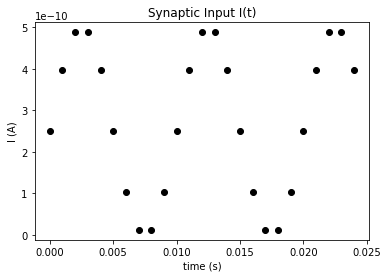

In [14]:
# plotting current

#################################################
## TODO for students: fill out the figure initialization and plotting code below ##
# Fill out code and comment or remove the next line

#raise NotImplementedError("Student exercise: You need to fill out current figure code")
#################################################

# Initialize step_end
step_end = 25

# Initialize the figure
plt.figure()
plt.title('Synaptic Input I(t)')
plt.xlabel('time (s)')
plt.ylabel('I (A)')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Plot i (use 'ko' to get small black dots (short for color='k' and marker = 'o'))
  plt.plot(t, i, 'ko')

# Display the plot
plt.show()

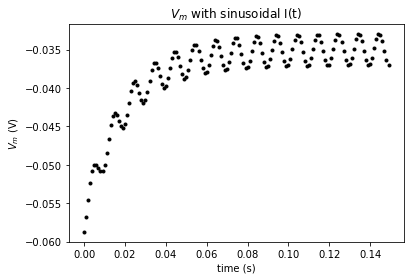

In [16]:
#plotting membrane potential

#################################################
## TODO for students: fill out the figure initialization and plotting code below ##
# Fill out code and comment or remove the next line
#raise NotImplementedError("Student exercise: You need to fill out membrane potential figure code")
#################################################

# Initialize step_end
step_end = int(t_max / dt)

# Initialize v0
v = el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)');

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Compute v
  v = v + dt/tau * (el - v + r*i)

  # Plot v (using 'k.' to get even smaller markers)
  plt.plot(t, v, 'k.')

# Display plot
plt.show()

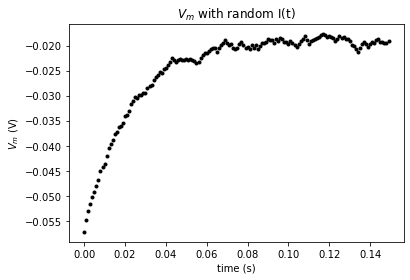

In [17]:
# Adding randomness to the input current

#################################################
## TODO for students: fill out code to get random input ##
# Fill out code and comment or remove the next line
#raise NotImplementedError("Student exercise: You need to fill out random input code")
##################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end and v
step_end = int(t_max / dt)
v = el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Get random number in correct range of -1 to 1 (will need to adjust output of np.random.random)
  random_num = np.random.random()

  # Compute value of i at this time step
  i = i_mean * (1 + 0.1 * np.sqrt(t_max / dt) * random_num)

  # Compute v
  v = v + dt/tau * (el - v + r*i)

  # Plot v (using 'k.' to get even smaller markers)
  plt.plot(t, v, 'k.')


# Display plot
plt.show()

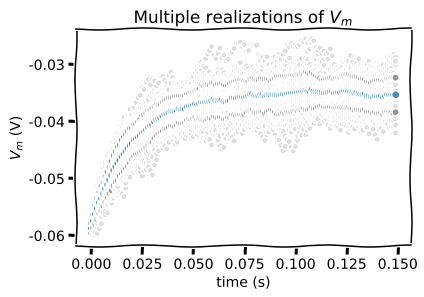

In [43]:
# Multiple runs for statistical analasys

#################################################
## TODO for students: fill out code to store v in list ##
# Fill out code and comment or remove the next line
#raise NotImplementedError("Student exercise: You need to store v in list")
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n

with plt.xkcd():
  # Initialize the figure
  plt.figure()
  plt.title('Multiple realizations of $V_m$')
  plt.xlabel('time (s)')
  plt.ylabel('$V_m$ (V)')

  # Loop for step_end steps
  for step in range(step_end):

    # Compute value of t
    t = step * dt

    # Loop for n simulations
    for j in range(0, n):

      # Compute value of i at this time step
      i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))

      # Compute value of v for this simulation
      v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)
        
    # Compute sample mean by summing list of v_n using sum, and dividing by n
    v_mean = sum(v_n) / n
    
    # Initialize a list `v_var_n` with the contribution of each V_n(t) to
    # Var(t) with a list comprehension over values of v_n
    v_var_n = [(v - v_mean)**2 for v in v_n]
    
    # Compute sample variance v_var by summing the values of v_var_n with sum and dividing by n-1
    v_var = sum(v_var_n) / (n-1)
    
    # Compute the standard deviation v_std with the function np.sqrt
    v_std = np.sqrt(v_var)

    # Plot simulations
    plt.plot(n*[t], v_n, 'k.', alpha=0.1)

    # Plot sample mean using alpha=0.8 and'C0.' for blue
    plt.plot(t, v_mean, 'C0.', alpha=0.8, markersize=10)

    # Plot mean + standard deviation with alpha=0.8 and argument 'C7'
    plt.plot(t, v_mean + v_std, 'C7.', alpha=0.8, markersize=8)

    # Plot mean - standard deviation with alpha=0.8 and argument 'C7'
    plt.plot(t, v_mean - v_std, 'C7.', alpha=0.8, markersize=8)

  # Display plot
  plt.show()

In [34]:
print(el)

-0.06


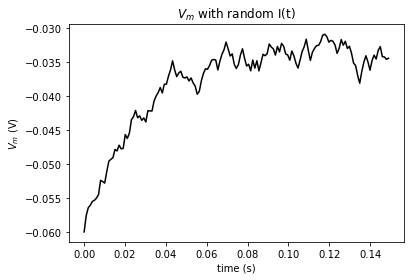

In [5]:
#Using numpy to do everything

#################################################
## TODO for students: fill out code to rewrite simulation in numpy##
# Fill out code and comment or remove the next line
#raise NotImplementedError("Student exercise: You need to rewrite simulation in numpy")
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, v
step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

# Simulate current over time
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random(step_end) - 1))

# Loop for step_end values of i using enumerate
for step, i_step in enumerate(i):

  # Skip first iteration
  if step==0:
    continue

  # Compute v as function of i using i_step
  v[step] = v[step - 1] + (dt / tau) * (el - v[step - 1] + r * i_step)

# Plot figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k')
plt.show()

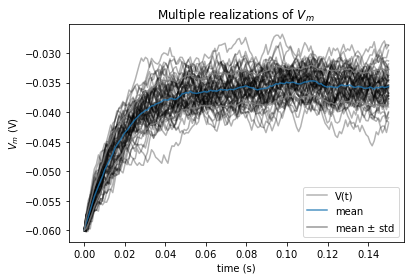

In [6]:
#################################################
## TODO for students: fill out code to compute sample mean and standard deviation ##
# Fill out code and comment or remove the next line
#raise NotImplementedError("Student exercise: You need to  fill out code to compute sample mean and standard deviation")
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end, n, t_range, v and i
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Loop for step_end - 1 steps
for step in range(1, step_end):

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])

# Compute sample mean (use np.mean)
v_mean = np.mean(v_n, axis=0)

# Compute sample standard deviation (use np.std)
v_std = np.std(v_n, axis=0)

# Plot figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v_n.T, 'k', alpha=0.3)

plt.plot(t_range, v_n[-1], 'k', alpha=0.3, label='V(t)')
plt.plot(t_range, v_mean, 'C0', alpha=0.8, label='mean')
plt.plot(t_range, v_mean+v_std, 'C7', alpha=0.8)
plt.plot(t_range, v_mean-v_std, 'C7', alpha=0.8, label='mean $\pm$ std')

plt.legend()
plt.show()

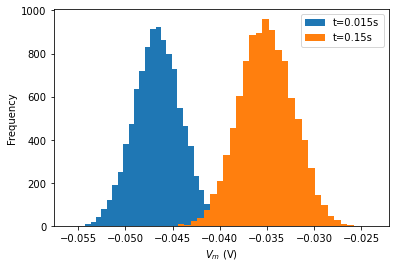

In [18]:
#################################################
## TODO for students: fill out code to plot histogram ##
# Fill out code and comment or remove the next line
#raise NotImplementedError("Student exercise: You need to plot histogram")
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize t_range, step_end, n, v_n, i and nbins
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 10000
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))
nbins = 32

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step==0:
    continue

  # Compute v_n
  v_n[:, step] =  v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])

# Initialize the figure
plt.figure()
plt.ylabel('Frequency')
plt.xlabel('$V_m$ (V)')

# Plot a histogram at t_max/10 (add labels and parameters histtype='stepfilled' and linewidth=0)
plt.hist(v_n[:,int(step_end /10)], nbins, histtype='stepfilled', linewidth=0, label = 't='+ str(t_max / 10) + 's')


# Plot a histogram at t_max (add labels and parameters histtype='stepfilled' and linewidth=0)
plt.hist(v_n[:, -1], nbins, histtype='stepfilled', linewidth=0, label = 't='+ str(t_max) + 's')

# Add legend
plt.legend()
plt.show()

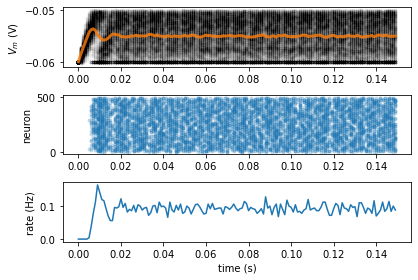

In [22]:
# Adding Spikes and scatter plots

# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize spikes and spikes_n
spikes = {j: [] for j in range(n)}
spikes_n = np.zeros([step_end])

#################################################
## TODO for students: add spikes to LIF neuron ##
# Fill out function and remove
#raise NotImplementedError("Student exercise: add spikes to LIF neuron")
#################################################

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step==0:
    continue

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

  # Loop over simulations
  for j in range(n):

    # Check if voltage above threshold
    if v_n[j, step] >= vth:

      # Reset to reset voltage
      v_n[j, step] = el

      # Add this spike time
      spikes[j] += [t]

      # Add spike count to this step
      spikes_n[step] += 1

# Collect mean Vm and mean spiking rate
v_mean = np.mean(v_n, axis=0)
spikes_mean =  spikes_n / n

# Initialize the figure
plt.figure()

# Plot simulations and sample mean
ax1 = plt.subplot(3, 1, 1)
for j in range(n):
  plt.scatter(t_range, v_n[j], color="k", marker=".", alpha=0.01)
plt.plot(t_range, v_mean, 'C1', alpha=0.8, linewidth=3)
plt.ylabel('$V_m$ (V)')

# Plot spikes
plt.subplot(3, 1, 2, sharex=ax1)
# for each neuron j: collect spike times and plot them at height j
for j in range(n):
  times = np.array(spikes[j])
  plt.scatter(times, j*np.ones_like(times), color="C0", marker=".", alpha=0.2)

plt.ylabel('neuron')

# Plot firing rate
plt.subplot(3, 1, 3, sharex=ax1)
plt.plot(t_range, spikes_mean)
plt.xlabel('time (s)')
plt.ylabel('rate (Hz)')

plt.tight_layout()

In [ ]:
def plot_all(t_range, v, raster=None, spikes=None, spikes_mean=None):
    # Initialize the figure
    plt.figure()
    
    num_subplots = 1
    if(raster): num_subplots += 1
    if(spikes): num_subplots += 1
    if(spikes_mean): num_subplots += 1
        
    plot_ind = 1
    
    # Plot simulations and sample mean
    ax1 = plt.subplot(num_subplots, 1, plot_ind)
    for j in range(n):
      plt.scatter(t_range, v_n[j], color="k", marker=".", alpha=0.01)
    plt.plot(t_range, v_mean, 'C1', alpha=0.8, linewidth=3)
    plt.ylabel('$V_m$ (V)')
    plot_ind += 1

    # Plot spikes
    plt.subplot(3, 1, 2, sharex=ax1)
    # for each neuron j: collect spike times and plot them at height j
    for j in range(n):
      times = np.array(spikes[j])
      plt.scatter(times, j*np.ones_like(times), color="C0", marker=".", alpha=0.2)

    plt.ylabel('neuron')

    # Plot firing rate
    plt.subplot(3, 1, 3, sharex=ax1)
    plt.plot(t_range, spikes_mean)
    plt.xlabel('time (s)')
    plt.ylabel('rate (Hz)')

    plt.tight_layout()

In [24]:
#  Using boolean indexing instead of looping

# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize spikes and spikes_n
spikes = {j: [] for j in range(n)}
spikes_n = np.zeros([step_end])

#################################################
## TODO for students: use Boolean indexing ##
# Fill out function and remove
#raise NotImplementedError("Student exercise: using Boolean indexing")
#################################################

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step == 0:
    continue

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

  # Initialize boolean numpy array `spiked` with v_n > v_thr
  spiked = (v_n[:,step] > vth)

  # Set relevant values of v_n to resting potential using spiked
  v_n[spiked,step] = vr

  # Collect spike times
  for j in np.where(spiked)[0]:
    spikes[j] += [t]
    spikes_n[step] += 1

# Collect mean spiking rate
spikes_mean = spikes_n / n

# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, spikes=spikes, spikes_mean=spikes_mean)

NameError: name 'plot_all' is not defined

In [25]:
#################################################
## TODO for students: make a raster ##
# Fill out function and remove
#raise NotImplementedError("Student exercise: make a raster ")
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step==0:
    continue

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

  # Initialize boolean numpy array `spiked` with v_n > v_thr
  spiked = (v_n[:,step] >= vth)

  # Set relevant values of v_n to v_reset using spiked
  v_n[spiked,step] = vr

  # Set relevant elements in raster to 1 using spiked
  raster[spiked,step] = 1.

# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, raster)

NameError: name 'plot_all' is not defined